In [ ]:
from google.colab import files
uploaded = files.upload()

Saving EastWestAirlines (3).csv to EastWestAirlines (3).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from pandas.core.common import random_state

In [ ]:
ewa = pd.read_csv('EastWestAirlines (3).csv')

In [ ]:
def norm_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return(x)

In [ ]:
df_norm=norm_func(ewa.iloc[:,1:])

In [ ]:
wcss=[]
for i in range(10,20):
  kmeans=KMeans(n_clusters=i,random_state=2)
  kmeans.fit(df_norm)
  wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

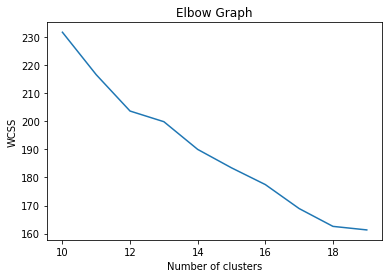

In [ ]:
plt.plot(range(10,20),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
model1=KMeans(n_clusters=14)
model1.fit(df_norm)

KMeans(n_clusters=14)

In [ ]:
model1.cluster_centers_
model1.labels_

array([10, 10, 10, ..., 12,  9,  9], dtype=int32)

In [ ]:
model=pd.Series(model1.labels_)
model

0       10
1       10
2       10
3       10
4        8
        ..
3994     3
3995     3
3996    12
3997     9
3998     9
Length: 3999, dtype: int32

In [ ]:
ewa['clust']=model

In [ ]:
ewafinal=ewa.iloc[:,[12,0,1,2,3,4,5,6,7,8,9,10,11]]

In [ ]:
new=ewa.iloc[:,1:13].groupby(ewafinal.clust).mean()